In [1]:
import math
from datetime import datetime
from pathlib import Path
from random import choice
from typing import List, Tuple, Union
import re

import FaceWrapper
import matplotlib.pyplot as plt

In [2]:
def display_images(*images, gray=False):
    """
    Display any number of images in a roughly square grid.

    Args:
        *images: A variable number of image arrays.
        gray (bool): If True, displays all images in grayscale.
    """
    if len(images) == 1 and isinstance(images[0], (list, tuple)):
        images = images[0]
    n = len(images)
    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)

    plt.figure(figsize=(5 * cols, 5 * rows))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        if gray:
            plt.imshow(img, cmap="gray")
        else:
            plt.imshow(img)
        plt.axis("off")
    plt.tight_layout()
    plt.show()


In [3]:
# Get sample images for CNN model
test_im_files = sorted(
    Path("data/prashantarorat/facial-key-point-data/images").glob("04*.png")
)
len(test_im_files)

1000

In [4]:
VIDEO_LENGTH = 3.0  # seconds
FPS = 30
VIDEO_FRAME_COUNT = int(VIDEO_LENGTH * FPS)

In [5]:
output_path = Path("output/videos")
output_path.mkdir(parents=True, exist_ok=True)

print(output_path)

output/videos


In [ ]:
def create_face_morph(
    face1_path: Union[Path, str],
    face2_path: Union[Path, str],
    morph_3d: bool = False,
    align: bool = False,
    add_background_points: bool = True,
    frame_count: int = VIDEO_FRAME_COUNT,
    fps: int = FPS,
    before_and_after: int = 1,
    display: bool = True,
    pad_frames: int = int(1 * FPS),
) -> Tuple[Path, List]:
    # Ensure paths are Path objects
    face1_path = Path(face1_path)
    face2_path = Path(face2_path)

    # Get number from filename
    pattern = re.compile(r"(04\d+)")
    match1 = pattern.search(str(face1_path))
    match2 = pattern.search(str(face2_path))
    num1 = match1.group(1) if match1 else "unknown"
    num2 = match2.group(1) if match2 else "unknown"

    print(face1_path, face2_path)

    parameters = {
        "face1": face1_path,
        "face2": face2_path,
        "align": align,
        "addBackgroundPoints": add_background_points,
    }

    sequence = FaceWrapper.ParappaTheFaceWrappa(parameters)
    sequence.setup_faces()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Face 1")
    plt.axis("off")
    plt.imshow(sequence.face1.imc1)
    plt.subplot(1, 2, 2)
    plt.title("Face 2")
    plt.axis("off")
    plt.imshow(sequence.face2.imc1)
    plt.show()

    # Create morph with head interpolation
    images = []
    if morph_3d:
        images = sequence.typical_interpolate_morph(
            before_and_after=before_and_after, timelapse=frame_count
        )
    else:
        images = sequence.typical_morph(timelapse=frame_count)

    morph_name_parts = [
        "morph",
        "3d" if morph_3d else "2d",
        "aligned" if align else "noalign",
        num1,
        num2,
        datetime.now().strftime("%Y%m%d_%H%M%S"),
    ]
    morph_name = "_".join(morph_name_parts)

    # Generate output filename with timestamp
    output_file = output_path / f"{morph_name}.mp4"
    sequence.convert_to_video(
        images,
        fps,
        str(output_file),
        pad_beginning_frames=pad_frames,
        pad_end_frames=pad_frames,
    )

    if display:
        display_images(images)

    return output_file, images

data/prashantarorat/facial-key-point-data/images/04712.png data/prashantarorat/facial-key-point-data/images/04746.png
getting landmarks from CNN model
getting landmarks from CNN model
images are the same size, skipping resizing
getting landmarks from CNN model
getting landmarks from CNN model


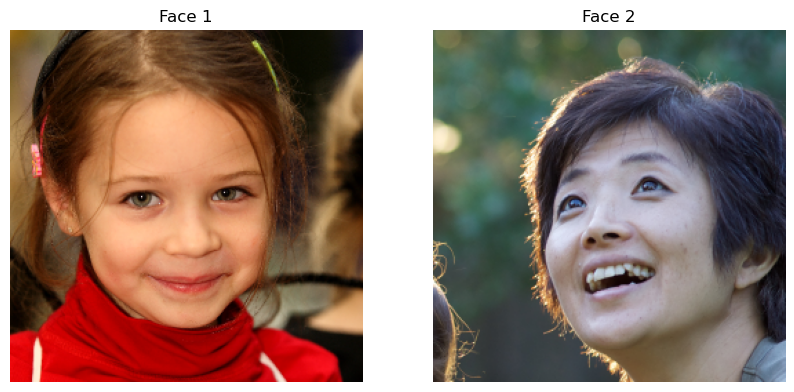

TypeError: cannot unpack non-iterable NoneType object

In [8]:
f, ims = create_face_morph(
    face1_path=choice(test_im_files),
    face2_path=choice(test_im_files),
    morph_3d=True,
)
